In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
df['']

In [7]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,?,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [8]:
df1 = df1.replace('?',np.nan)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
age           294 non-null int64
sex           294 non-null int64
cp            294 non-null int64
trestbps      293 non-null object
chol          271 non-null object
fbs           286 non-null object
restecg       293 non-null object
thalach       293 non-null object
exang         293 non-null object
oldpeak       294 non-null float64
num           294 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 25.3+ KB


In [10]:
df1[df1.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
2,29,1,2,140,NaN,0,0,170,0,0.0,0
27,38,0,2,120,275,NaN,0,129,0,0.0,0
31,39,1,2,120,NaN,0,1,146,0,2.0,0
34,39,1,2,130,NaN,0,0,120,0,0.0,0
44,40,1,3,140,NaN,0,0,188,0,0.0,0
65,43,0,3,150,NaN,0,0,175,0,0.0,0
72,45,0,2,180,NaN,0,0,180,0,0.0,0
75,45,1,3,135,NaN,0,0,110,0,0.0,0
81,46,1,3,150,163,NaN,0,116,0,0.0,0
86,47,0,3,130,NaN,0,0,145,0,2.0,0


In [11]:
df1 = df1.fillna(df.median())

In [12]:
df1['chol','fbs','restecg','thalach','exang'] = df1[['chol','fbs','restecg','thalach','exang']].astype('float64')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
6,32,1,2,110,225,0,0,184,0,0.0,0
7,32,1,2,125,254,0,0,155,0,0.0,0
8,33,1,3,120,298,0,0,185,0,0.0,0
9,34,0,2,130,161,0,0,190,0,0.0,0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
age           294 non-null int64
sex           294 non-null int64
cp            294 non-null int64
trestbps      293 non-null object
chol          271 non-null object
fbs           286 non-null object
restecg       293 non-null object
thalach       293 non-null object
exang         293 non-null object
oldpeak       294 non-null float64
num           294 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 25.3+ KB


In [15]:
df1 = df1.fillna(df.median())

In [16]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [17]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num       '],
      dtype='object')

In [18]:
df1.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num']

In [19]:
df1.num.value_counts()

0    188
1    106
Name: num, dtype: int64

In [20]:
df1.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [5]:
nf = pd.read_csv("heart.csv")

In [6]:
nf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
nf['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [29]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [25]:
nf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
nf.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


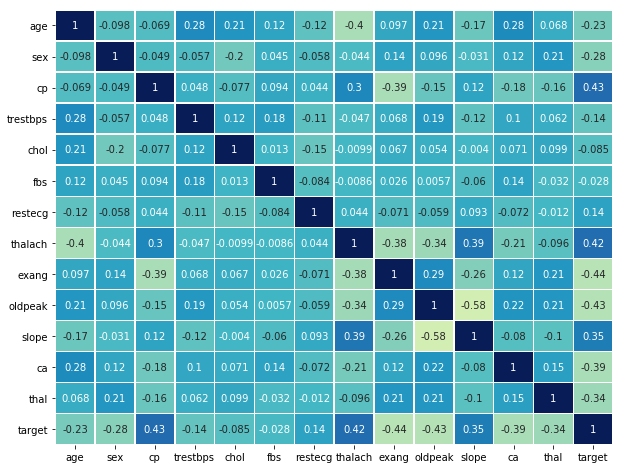

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(nf.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

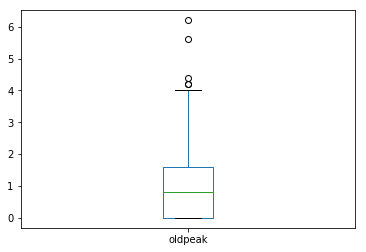

In [9]:
nf['oldpeak'].plot(kind = 'box')

In [37]:
# logistic regression

In [39]:
nf.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [40]:
m=smf.ols('target~age+sex+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+slope+ca+thal',nf).fit()

In [47]:
from sklearn.model_selection import train_test_split

In [69]:
X = nf.drop(['target'],axis =1)
y = nf['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
predict = model.predict(X_test)
predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [53]:
metrics.accuracy_score(y_test,predict)

0.8131868131868132

In [ ]:
# fitting model for attributes after dropping attributes with less p values

In [10]:
X = nf[['sex','cp','thalach','exang','ca','thal']]
y = nf['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
model1 = LogisticRegression()

In [12]:
model1.fit(X_train,y_train)

c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
predict1 = model1.predict(X_test)
predict1

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [14]:
metrics.accuracy_score(y_test,predict1)

0.8131868131868132

In [98]:
kf=KFold(n_splits=3,shuffle=True,random_state=42)
acc=[]
pre=[]
recall =[]
for train,test in kf.split(X,y):
    M=LogisticRegression()
    Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
    Ytrain,Ytest=y.iloc[train],y.iloc[test]
    M.fit(Xtrain,Ytrain)
    Y_predict=M.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
    cm = metrics.accuracy_score(Ytest,Y_predict)
    
    print(metrics.confusion_matrix(Ytest,Y_predict))
    print(metrics.classification_report(Ytest,Y_predict))
print("Cross-validated Score:%.2f%% " % np.mean(acc))

[[33  9]
 [10 49]]
             precision    recall  f1-score   support

          0       0.77      0.79      0.78        42
          1       0.84      0.83      0.84        59

avg / total       0.81      0.81      0.81       101

[[35 15]
 [ 4 47]]
             precision    recall  f1-score   support

          0       0.90      0.70      0.79        50
          1       0.76      0.92      0.83        51

avg / total       0.83      0.81      0.81       101

[[34 12]
 [ 6 49]]
             precision    recall  f1-score   support

          0       0.85      0.74      0.79        46
          1       0.80      0.89      0.84        55

avg / total       0.82      0.82      0.82       101

Cross-validated Score:0.82% 


In [41]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.49e-38
Time:                        16:56:11   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.293      2.830      0.005       0.252       1.405
age           -0.0008      0.003     -0.304      0.761      -0.006       0.004
sex           -0.1960      0.047     -4.157      0.000      -0.289      -0.103
cp             0.1127      0.022      5.036      0.000       0.069       0.157
trestbps      -0.0020      0.001     -1.583      0.114      -0.004       0.000
chol          -0.0004      0.000     -0.838      0.403      -0.001       0.000
fbs            0.0174      0.060      0.291      0.771      -0.100       0.135
restecg        0.0498      0.040      1.249      0.213      -0.029       0.128
thalach        0.0030      0.001      2.671      0.008       0.001       0.005
exang         -0.1440      0.051     -2.804      0.005      -0.245      -0.043
oldpeak       -0.0588      0.023     -2.564      0.011      -0.104      -0.014
slope          0.0790      0.042      1.863      0.063      -0.004       0.162
ca            -0.1006      0.022     -4.603      0.000      -0.144      -0.058
thal          -0.1190      0.036     -3.339      0.001      -0.189      -0.049
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                     4.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
m1=smf.ols('target~sex+cp+thalach+exang+oldpeak+ca+thal',nf).fit()

In [43]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     42.17
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           5.58e-41
Time:                        16:59:01   Log-Likelihood:                -113.65
No. Observations:                 303   AIC:                             243.3
Df Residuals:                     295   BIC:                             273.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5365      0.180      2.977      0.003       0.182       0.891
sex           -0.1769      0.046     -3.886      0.000      -0.266      -0.087
cp             0.1093      0.022      4.919      0.000       0.066       0.153
thalach        0.0035      0.001      3.423      0.001       0.001       0.006
exang         -0.1576      0.051     -3.074      0.002      -0.259      -0.057
oldpeak       -0.0875      0.020     -4.462      0.000      -0.126      -0.049
ca            -0.1030      0.021     -4.868      0.000      -0.145      -0.061
thal          -0.1235      0.036     -3.471      0.001      -0.193      -0.053
==============================================================================
Omnibus:                        7.758   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.998
Skew:                          -0.396   Prob(JB):                       0.0183
Kurtosis:                       2.918   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
m2=smf.ols('target~trestbps+chol+thalach+oldpeak',nf).fit()

In [46]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     28.74
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           3.26e-20
Time:                        17:01:14   Log-Likelihood:                -169.27
No. Observations:                 303   AIC:                             348.5
Df Residuals:                     298   BIC:                             367.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0398      0.272      0.146      0.884      -0.496       0.576
trestbps      -0.0018      0.001     -1.263      0.208      -0.005       0.001
chol          -0.0006      0.000     -1.163      0.246      -0.001       0.000
thalach        0.0068      0.001      5.956      0.000       0.005       0.009
oldpeak       -0.1322      0.023     -5.764      0.000      -0.177      -0.087
==============================================================================
Omnibus:                       40.080   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.740
Skew:                          -0.297   Prob(JB):                     0.000630
Kurtosis:                       2.098   Cond. No.                     3.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  ridge lasso

In [64]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
rd=Ridge(alpha=0.05,normalize=True)
Ls=Lasso(alpha=0.01,normalize=True)

In [81]:
rd.fit(X_train,y_train)
rd_pred=rd.predict(X_test)
Ls.fit(X_train,y_train)
Ls_pred=Ls.predict(X_test)

In [71]:
rd.coef_

array([ 0.00116727, -0.14598268,  0.09485448, -0.00085052, -0.00019385,
        0.05740847,  0.05787859,  0.00223319, -0.18233822, -0.04215949,
        0.11632584, -0.14022863, -0.16194009])

In [82]:
Ls.coef_

array([-0.        , -0.        ,  0.03203118, -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.11384729, -0.02950311,
        0.        , -0.0489766 , -0.02830036])

In [86]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [99]:
# fitting model for attributes predicted by lasso

In [103]:
X = nf[['cp','exang','oldpeak','ca','thal']]
y = nf['target']

X_train, X_final, y_train, y_final = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
m3 = LogisticRegression()
m3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
predict3 = m3.predict(X_test)
metrics.accuracy_score(y_test,predict3)

0.7802197802197802

###  k fold

In [95]:
from sklearn.model_selection import KFold

In [96]:
kf=KFold(n_splits=3,shuffle=True,random_state=42)
acc=[]
pre=[]
recall =[]
for train,test in kf.split(X_train,y_train):
    M=LogisticRegression()
    Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
    Ytrain,Ytest=y.iloc[train],y.iloc[test]
    M.fit(Xtrain,Ytrain)
    Y_predict=M.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
    cm = metrics.accuracy_score(Ytest,Y_predict)
    
    print(metrics.confusion_matrix(Ytest,Y_predict))
    print(metrics.classification_report(Ytest,Y_predict))
print("Cross-validated Score:%.2f%% " % np.mean(acc))

[[33  9]
 [12 47]]
             precision    recall  f1-score   support

          0       0.73      0.79      0.76        42
          1       0.84      0.80      0.82        59

avg / total       0.80      0.79      0.79       101

[[34 16]
 [ 7 44]]
             precision    recall  f1-score   support

          0       0.83      0.68      0.75        50
          1       0.73      0.86      0.79        51

avg / total       0.78      0.77      0.77       101

[[34 12]
 [ 7 48]]
             precision    recall  f1-score   support

          0       0.83      0.74      0.78        46
          1       0.80      0.87      0.83        55

avg / total       0.81      0.81      0.81       101

Cross-validated Score:0.79% 


In [119]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

y_predict = model.predict(X_test)

In [120]:
metrics.accuracy_score(y_test, y_predict)

0.7912087912087912